# COGS 108 - Final Project : Weapon Usage in LA

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ `X` ] YES - make available
* [  ] NO - keep private

# Overview

Our project focuses on the factors contributing to weapon usage in criminal activity in Los Angeles. After doing data cleaning and further calculations on data, we relates area, crime type, and victim to weapon usage. With clear data visualization, we found that less safe area, certain crime code, and ... contributes to high weapon usage rate in criminal activity in Los Angeles.

# Names

- Yandong Xiang
- Siying Yang
- Tianshi Hu
- Zeyu Cao
- Muqing Di

<a id='research_question'></a>
# Research Question


What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)

Our research question is under what circumstances are weapons likely to be used in criminal activity in Los Angeles? With variables such as crime type, victim sex, victim age, etc, we observe whether criminals are likely to use weapons under those circumstances. This research topic may help justify under what conditions should police draw their guns towards the criminals. Other possible(more specific) topic includes in what areas are weapons more likely to be used in Los Angelas, etc.

<a id='background'></a>

## Background & Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through Markdown footnotes to specify which references support which statements** 

In California, lax gun control has led to crime in many areas. The focus of our group project is to investigate whether the crimes that occur in this particular place in Los Angeles are related to guns. We believe that after such data investigation and research, it can help the police, and even citizens, have a deeper understanding of the relationship between crime and guns.

In our research, we found a strong correlation between crime and firearms in the Los Angeles area. Offenders tend to pull out guns and threaten victims when committing crimes. In the analysis database of the recent crime rate, we get that the relationship between the crime rate and guns in different regions is also different. Certain areas have higher rates of gun crime than others. Here are some references.

References (include links):
- Overall crime is up in L.A. for the second straight year, LAPD reports: https://www.latimes.com/local/california/la-me-lapd-crime-increase-20160722-snap-story.html
- Gun Violence in California: https://maps.everytownresearch.org/wp-content/uploads/2020/04/Every-State-Fact-Sheet-2.0-042720-California.pdf


# Hypothesis



What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

We predict that weapons are more likely to be used in felony crimes, in areas with high crime rate, and against physically weaker people(excluding 18-60 years old males). We are predicting in this way because first, felony crimes are serious and violent and commonly the criminals need weapon in order to commit such crimes, and by similar reason crimes happening in areas with high crime rate have larger chance of happening more violent crimes. Second, since the dataset includes Strong Arm(HANDS, FIST, FEET OR BODILY FORCE) as a weapon and very likely the most common weapon, we predict physically weaker victims adds chance of weapon use since strong arm are likely used by physically stronger criminals. 

# Dataset(s)

- Dataset Name: Crime in Los Angeles
- Link to the dataset: https://www.kaggle.com/datasets/cityofLA/crime-in-los-angeles?select=Crime_Data_2010_2017.csv
- Number of observations: 1584316

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. This data is transcribed from original crime reports that are typed on paper and includes different aspects of crime information like time, location, crime type, weapon type, victom info, etc.

# Setup

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)
  
# reading the CSV file
# csvFile = pd.read_csv('Crime_Data_2010_2017.csv') #The original file Crime_Data_2010_2017.csv is too large so stored in local, the randomly picked version is pushed to remote

# print(csvFile[:5])
# print(len(csvFile))

# Data Cleaning

First, the original csv is too large for github to store, we want to randomly pick 500000 entries and write that to new csv file. The new csv file will be used for further investigation.

In [2]:
# For first time:
# csvFile = csvFile.sample(500000)
# csvFile.to_csv('Crime_Data_2010_2017_random_picked.csv')

csvFile = pd.read_csv('Crime_Data_2010_2017_random_picked.csv')

In [3]:
print(len(csvFile))

500000


Second, we want to just keep the necessary columns for our research question, which would include clearly 'Weapon Used Code'/'Weapon Description', and other variables that we hypothesised to affect weapon use, which are 'Area ID'/'Area Name', 'Crime Code'/'Crime Code Description', and victom informations including 'Victim Age', 'Victim Sex'. We want to investigate the relationship between weapon use and area, crime, victim separately, so three new dataframes created.

In [4]:
weaponToArea = csvFile[['Weapon Used Code',
 'Weapon Description','Area ID',
 'Area Name']]
weaponToCrime = csvFile[['Weapon Used Code',
 'Weapon Description','Crime Code',
 'Crime Code Description']]
weaponToVictim = csvFile[['Weapon Used Code',
 'Weapon Description', 'Victim Age',
 'Victim Sex']]

In [5]:
print(weaponToArea.columns.values.tolist())
print(weaponToCrime.columns.values.tolist())
print(weaponToVictim.columns.values.tolist())

['Weapon Used Code', 'Weapon Description', 'Area ID', 'Area Name']
['Weapon Used Code', 'Weapon Description', 'Crime Code', 'Crime Code Description']
['Weapon Used Code', 'Weapon Description', 'Victim Age', 'Victim Sex']


# Data Analysis & Results

#### EDA on Area to Crime

First, in order to check the shape and basic weapon usage information from our dataset, we used shape and value_counts() and gathered some basic information.

In [6]:
weaponToArea.shape

(500000, 4)

In [7]:
weaponToArea.value_counts('Weapon Description')

Weapon Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    101352
VERBAL THREAT                                      13920
UNKNOWN WEAPON/OTHER WEAPON                        12824
HAND GUN                                            8014
SEMI-AUTOMATIC PISTOL                               3148
                                                   ...  
RELIC FIREARM                                          3
ANTIQUE FIREARM                                        2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       2
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Length: 79, dtype: int64

In order to investigate further on how different area of the crime happening makes the weapon usage in crimes different, We want to group the data into areas and find the counts of crimes corresponding to each area.

In [8]:
AreaCrime = weaponToArea.value_counts('Area Name').sort_index().reset_index(name='crime_counts')
AreaCrime

,Area Name,crime_counts
0,77th Street,34975
1,Central,21270
2,Devonshire,23452
3,Foothill,19288
4,Harbor,22137
5,Hollenbeck,18167
6,Hollywood,22764
7,Mission,25451
8,N Hollywood,27175
9,Newton,23719


We also want to extract the count of crimes associated with weapon in each area, agg() function helps with it.

In [9]:
AreaCrimeWithWeapon =  weaponToArea.groupby('Area Name')['Weapon Description'].agg('count').reset_index(name='counts_with_weapon')
AreaCrimeWithWeapon

,Area Name,counts_with_weapon
0,77th Street,16120
1,Central,8758
2,Devonshire,4795
3,Foothill,6043
4,Harbor,6510
5,Hollenbeck,7032
6,Hollywood,7695
7,Mission,7859
8,N Hollywood,6461
9,Newton,10263


Finally, we want to combine the two dataframes we just created and calculate the weapon usage rate for each area.

In [10]:
AreaCrimeWithWeaponRates = AreaCrime.join(AreaCrimeWithWeapon['counts_with_weapon'])
AreaCrimeWithWeaponRates['WeaponRate(%)'] = AreaCrimeWithWeaponRates['counts_with_weapon'].div(AreaCrimeWithWeaponRates['crime_counts']/100)
AreaCrimeWithWeaponRates

,Area Name,crime_counts,counts_with_weapon,WeaponRate(%)
0,77th Street,34975,16120,46.090064
1,Central,21270,8758,41.175364
2,Devonshire,23452,4795,20.446017
3,Foothill,19288,6043,31.330361
4,Harbor,22137,6510,29.407779
5,Hollenbeck,18167,7032,38.707547
6,Hollywood,22764,7695,33.803374
7,Mission,25451,7859,30.878944
8,N Hollywood,27175,6461,23.775529
9,Newton,23719,10263,43.269109


After doing all these manipulations, we now have the weapon used rates for crimes in different areas, we want to make sure there does not exist any outliers for weapon rate. Z-test is applied and all rows are kept after the test, so there does not exist any outlier.

In [11]:
from scipy import stats

AreaCrimeWithWeaponRates[(np.abs(stats.zscore(AreaCrimeWithWeaponRates['WeaponRate(%)'])) < 3)]
len(AreaCrimeWithWeaponRates)

21

A naive hypothesis is that the more crime counts leading more dangerous an area is thus leads to higher weapon usage rate. We investigated this by looking for a linear trend in crime count and weapon rate.

<AxesSubplot:xlabel='crime_counts', ylabel='WeaponRate(%)'>

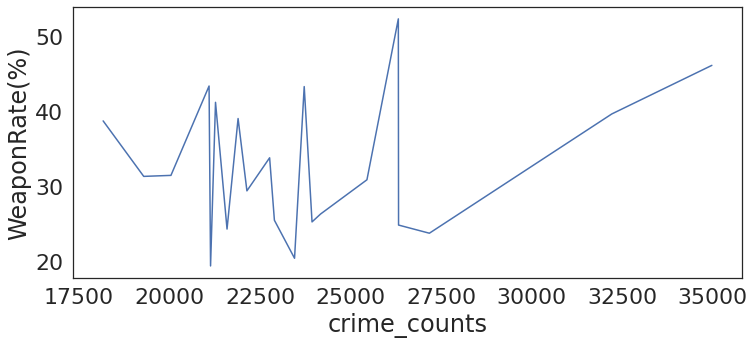

In [12]:
sns.lineplot(data = AreaCrimeWithWeaponRates, x='crime_counts', y='WeaponRate(%)')

Clearly such trend does not exist shown by the graph. One main reason is that crime_counts does not take the area size and population into consideration, so it does not reflect the crime rate. However, we can make connection from area to weapon usage rate in crimes by simply looking at its location.

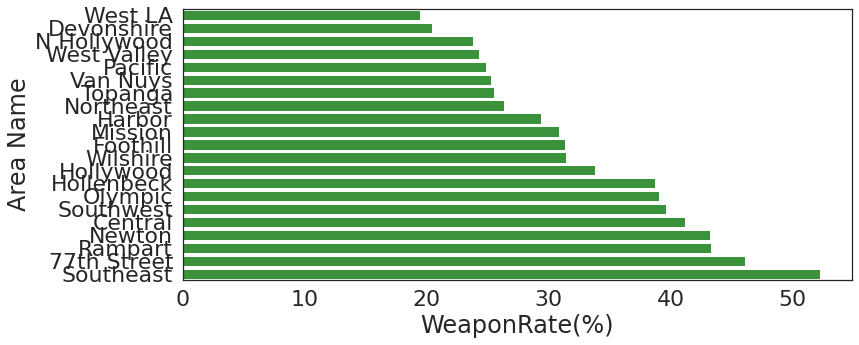

In [13]:
df_sorted = AreaCrimeWithWeaponRates.sort_values('WeaponRate(%)')
plot_weaponRate = sns.barplot(x="WeaponRate(%)", y="Area Name", palette = ['tab:green'], data=df_sorted)
plt.show(plot_weaponRate)

![Alt text](https://www.qsl.net/n6uru/images/lapdcitymap2009.jpg)

From the bar plot sorted by weapon rate and the area map, we can see that high weapon usage rate areas(>35%) are located intensively on the map(labeled 1,2,3,4,12,13,18,20). Nearly all of these areas are located in central or south bureau. We can see clearer how different area location leads to different weapon rate by dividing the data into bureaus.

In [14]:
valley = AreaCrimeWithWeaponRates.iloc[[2, 3, 7, 8, 16, 17, 19]].mean()
west = AreaCrimeWithWeaponRates.iloc[[6, 11, 12, 18, 20]].mean()
central = AreaCrimeWithWeaponRates.iloc[[1, 5, 9, 10, 13]].mean()
south = AreaCrimeWithWeaponRates.iloc[[0, 4, 14, 15]].mean()
valley['Bureau Name'] = "Valley"
west['Bureau Name'] = "West"
central['Bureau Name'] = "Central"
south['Bureau Name'] = "South"

RatesByBureau = pd.concat([valley.to_frame().T,west.to_frame().T,central.to_frame().T,south.to_frame().T])
RatesByBureau['WeaponRate(%)'] = RatesByBureau['counts_with_weapon'].div(RatesByBureau['crime_counts']/100)

RatesByBureau

/tmp/ipykernel_1577/64964209.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  valley = AreaCrimeWithWeaponRates.iloc[[2, 3, 7, 8, 16, 17, 19]].mean()
/tmp/ipykernel_1577/64964209.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  west = AreaCrimeWithWeaponRates.iloc[[6, 11, 12, 18, 20]].mean()
/tmp/ipykernel_1577/64964209.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  central = AreaCrimeWithWeaponRates.iloc[[1, 5, 9, 10, 13]].mean()
/tmp/ipykernel_1577/64964209.py:4: FutureWar

,crime_counts,counts_with_weapon,WeaponRate(%),Bureau Name
0,23397.857143,6042.714286,25.82593,Valley
0,22430.6,6638.4,29.595285,West
0,21683.8,8311.8,38.331842,Central
0,28910.75,12288.5,42.504951,South


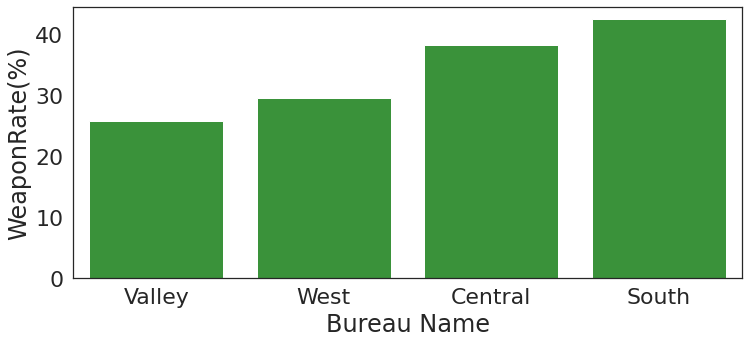

In [15]:
plot_weaponRateByBureau = sns.barplot(x="Bureau Name", y="WeaponRate(%)", palette = ['tab:green'], data=RatesByBureau)
plt.show(plot_weaponRateByBureau)

By taking means of the weapon rates of the different bureaus, we can conclude that areas in central and south part of LA does have higher weapon usage rate in crimes.

![label](https://scpr.brightspotcdn.com/dims4/default/665ca9e/2147483647/strip/true/crop/640x720+0+0/resize/640x720!/quality/90/?url=http%3A%2F%2Fscpr-brightspot.s3.amazonaws.com%2Flegacy%2Fi%2F11f450bd0733b95da5b75565271f4bd8%2F5b2c49c34488b30009279b3f-original.jpg) 

We have further conclusion when we compare that with safety map of Los Angeles, we can match the areas with least safe score with the areas/bureaus we found with highest weapon usage rate in crimes. Therefore, there exists a correlation that with areas being less safe, the crimes happening in the area have higher rate of weapon usage.

#### EDA on Weapon to Crime

In [16]:
weaponToCrime.head(5)

,Weapon Used Code,Weapon Description,Crime Code,Crime Code Description
0,NaN,NaN,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
1,302.0,BLUNT INSTRUMENT,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
2,NaN,NaN,310,BURGLARY
3,NaN,NaN,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)
4,NaN,NaN,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)


In [17]:
num_crime = len(weaponToCrime['Crime Code'].unique())
print(f'Number of unique crime types is {num_crime}')

Number of unique crime types is 134


There are 134 different crime types and we want to know how many of them correlates to weapon usage. But first, we need to visualize whether some crime code appear more than the others. So we can decide on whether to plot the count of weapon usage or the percentage of weapon usage.

maximum occurance is 46150, minimal occurance is 1


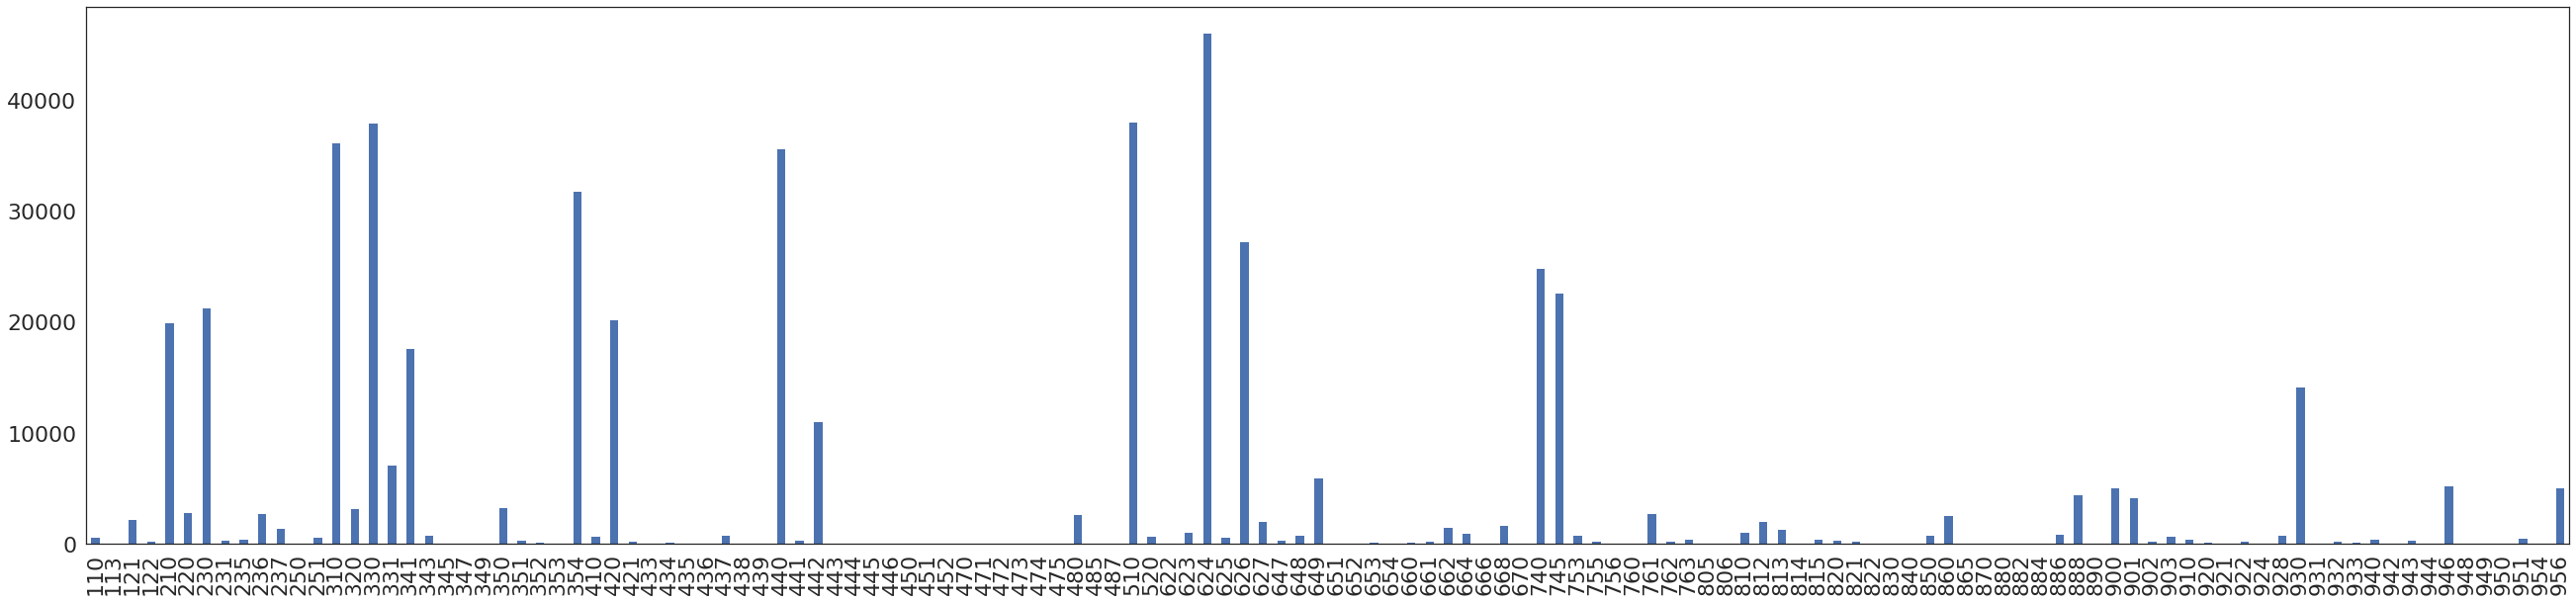

In [18]:
# Plot count of crime codes
weaponToCrime['Crime Code'].value_counts().sort_index().plot(kind="bar", figsize=(45,10))
top_occur = weaponToCrime['Crime Code'].value_counts().max()
min_occur = weaponToCrime['Crime Code'].value_counts().min()
print(f'maximum occurance is {top_occur}, minimal occurance is {min_occur}')

We can see from above that the occurances of crime codes greatly varies, while some of them occur more than 40000 times, some of them occcur only once. Thus, we want to both look at the count and percentage, since uncommon crimes might just occur with weapons by chance since the sample amount is small (to make sure it's not an outlier). We need to further investigate whether the crime type is related to weapons or it's just happened with weapon accidentally.

<AxesSubplot:xlabel='Crime Code'>

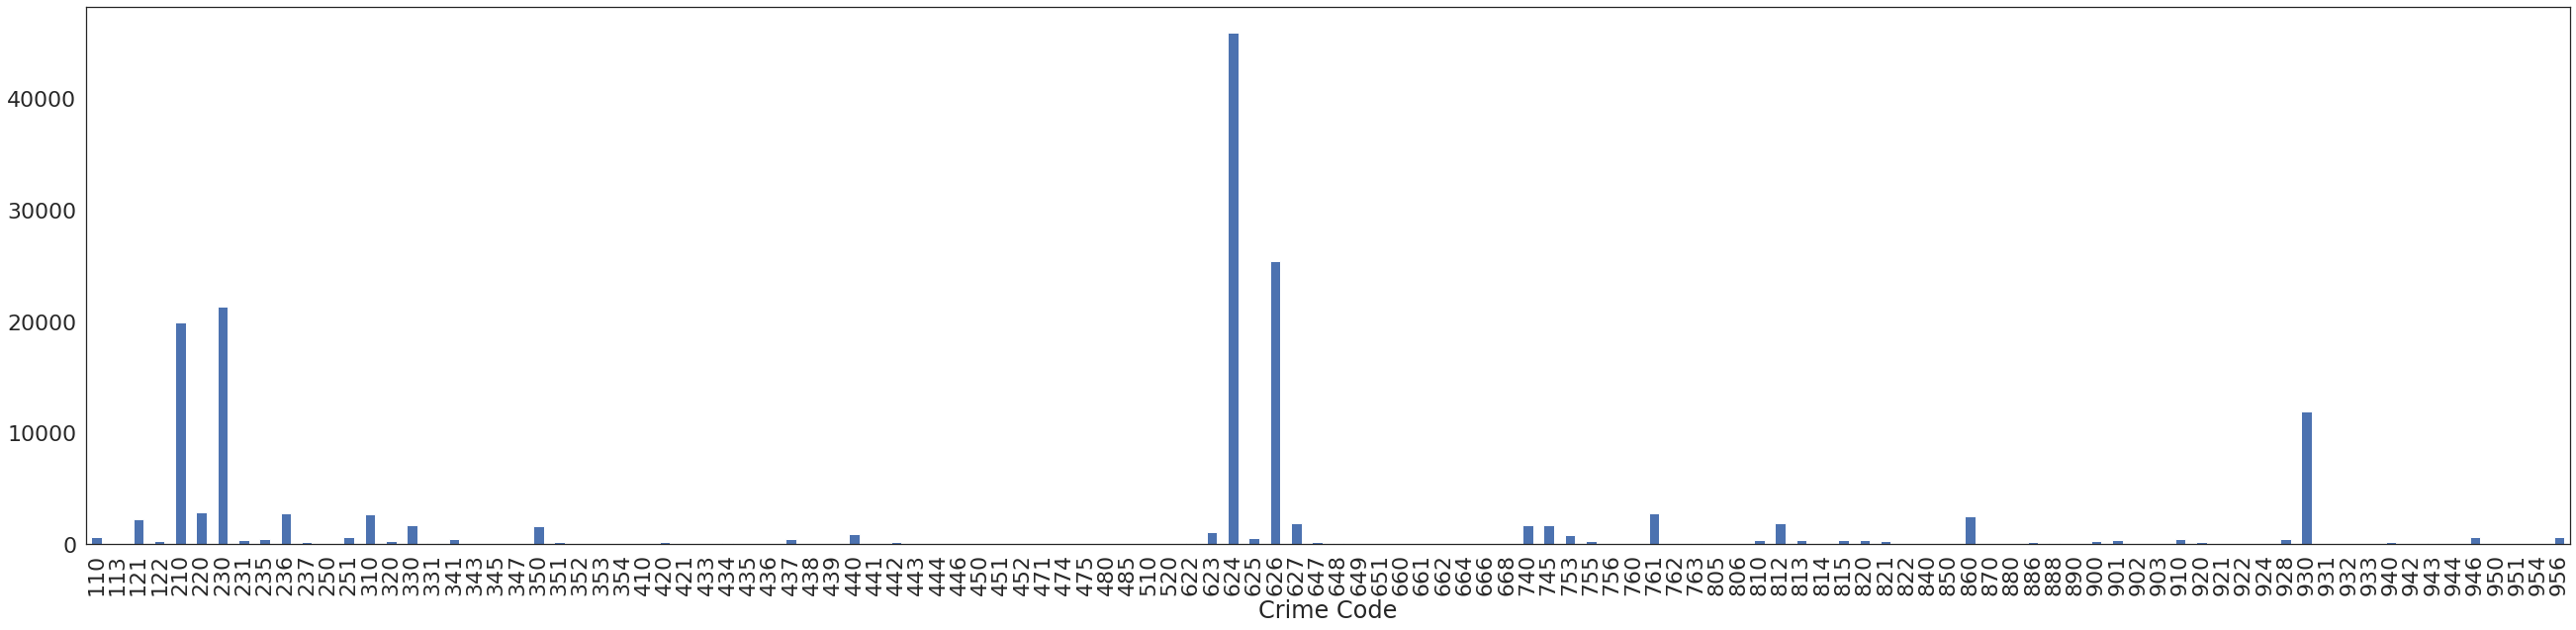

In [19]:
# plot weapon count by crime code
weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count().sort_index().plot(kind='bar', figsize=(45,10))

<AxesSubplot:xlabel='Crime Code'>

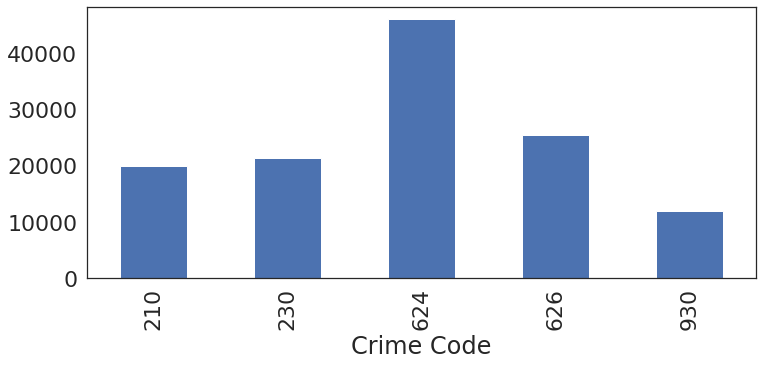

In [20]:
# plot weapon count by crime code
weapon_by_crime = weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count()
weapon_by_crime[weapon_by_crime > 10000].plot(kind = 'bar')

The above graph shows the crimes that happens with weapons the most, we can see that there are only 5 of them happens more than 10000 times.

In [21]:
weaponToCrime[(weaponToCrime['Crime Code']==210)|
              (weaponToCrime['Crime Code']==230)|
              (weaponToCrime['Crime Code']==624)|
              (weaponToCrime['Crime Code']==626)|
              (weaponToCrime['Crime Code']==930)]['Crime Code Description'].unique()

array(['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY',
       'INTIMATE PARTNER - SIMPLE ASSAULT'], dtype=object)

We can see that while 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' is predictable, but is hard to imagine that crimes like 'INTIMATE PARTNER - SIMPLE ASSAULT' are also likely to be the cause of using weapons.

<AxesSubplot:xlabel='Crime Code'>

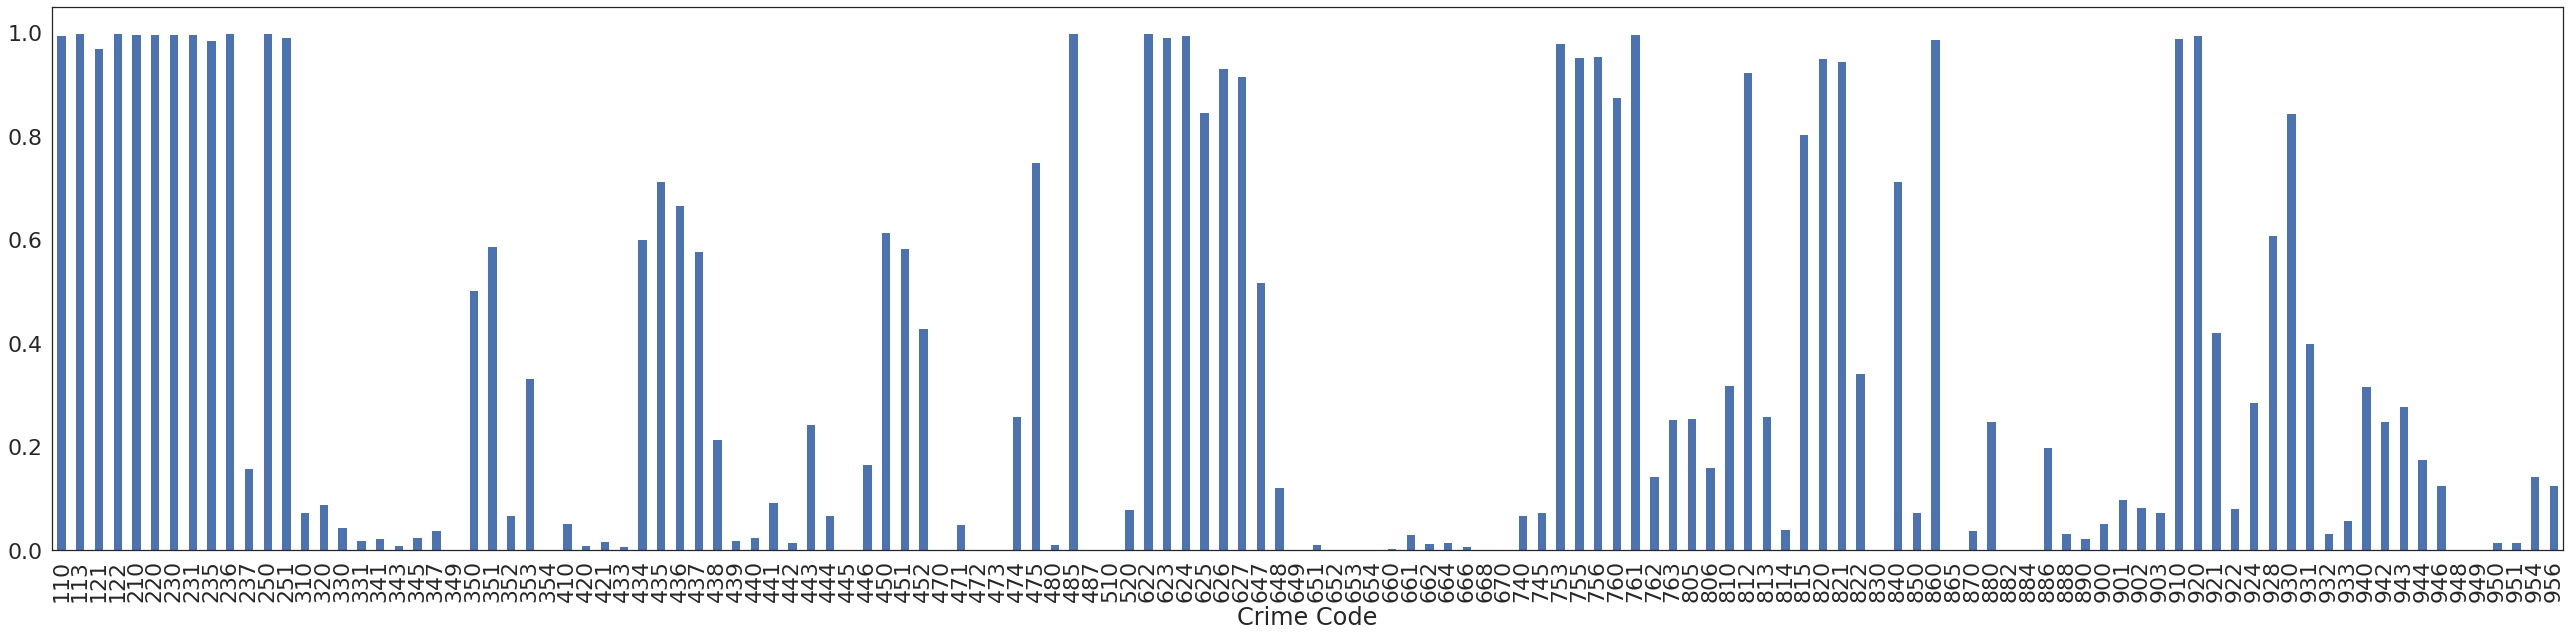

In [22]:
# plot weapon count by crime code in percentage
with_weapons = weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count()
total = weaponToCrime.groupby('Crime Code')['Weapon Used Code'].apply(lambda x: x.shape[0])
percentage_weapon = (with_weapons/total)
percentage_weapon.plot(kind='bar', figsize=(45,10))

<AxesSubplot:xlabel='Crime Code'>

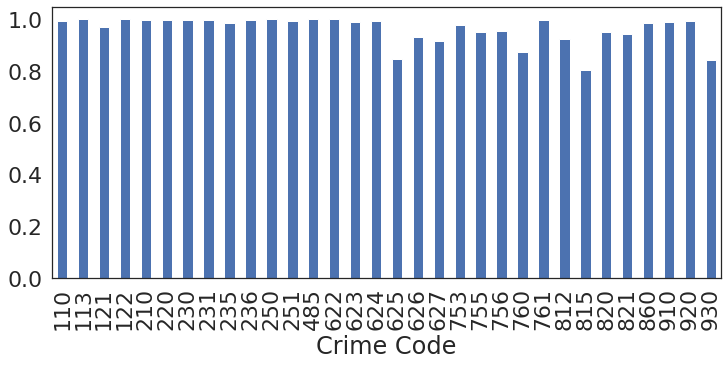

In [23]:
percentage_weapon[percentage_weapon > 0.8].plot(kind = 'bar')

We can again find 210, 230, 624, 626, 930 amongst the top crimes with weapons. Which provides an strong evidence that some of the crime types does strongly suggest that they might be conducted with weapons.

#### EDA on Weapon to Victim

In order to check the shape and basic weapon usage information from the dataset, we used shape and value_counts and gathered the basic information

In [24]:
weaponToVictim.shape

(500000, 4)

In [25]:
weaponToVictim.head(5)

,Weapon Used Code,Weapon Description,Victim Age,Victim Sex
0,NaN,NaN,14.0,NaN
1,302.0,BLUNT INSTRUMENT,52.0,M
2,NaN,NaN,28.0,F
3,NaN,NaN,32.0,F
4,NaN,NaN,14.0,M


In [26]:
weaponToVictim.value_counts('Weapon Description')

Weapon Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    101352
VERBAL THREAT                                      13920
UNKNOWN WEAPON/OTHER WEAPON                        12824
HAND GUN                                            8014
SEMI-AUTOMATIC PISTOL                               3148
                                                   ...  
RELIC FIREARM                                          3
ANTIQUE FIREARM                                        2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       2
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Length: 79, dtype: int64

In [27]:
weaponToVictim

,Weapon Used Code,Weapon Description,Victim Age,Victim Sex
0,NaN,NaN,14.0,NaN
1,302.0,BLUNT INSTRUMENT,52.0,M
2,NaN,NaN,28.0,F
3,NaN,NaN,32.0,F
4,NaN,NaN,14.0,M
...,...,...,...,...
499995,NaN,NaN,86.0,M
499996,200.0,KNIFE WITH BLADE 6INCHES OR LESS,68.0,F
499997,NaN,NaN,39.0,F
499998,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",38.0,F


In [28]:
VictimCrime = weaponToVictim.value_counts('Victim Sex').sort_index().reset_index(name='crime_counts')
VictimCrime

,Victim Sex,crime_counts
0,-,1
1,F,213686
2,H,20
3,M,233122
4,X,7535


In [29]:
VictimCrimeWithWeapon = weaponToVictim.groupby('Victim Sex')['Weapon Description'].agg('count').reset_index(name='counts_with_weapon')
VictimCrimeWithWeapon

,Victim Sex,counts_with_weapon
0,-,0
1,F,86135
2,H,7
3,M,78766
4,X,1270


In [30]:
VictimCrimeWithWeaponRates =VictimCrime.join(VictimCrimeWithWeapon['counts_with_weapon']) 
VictimCrimeWithWeaponRates['WeaponRate(%)'] = VictimCrimeWithWeaponRates['counts_with_weapon'].div(VictimCrimeWithWeaponRates['crime_counts']/100)
VictimCrimeWithWeaponRates


,Victim Sex,crime_counts,counts_with_weapon,WeaponRate(%)
0,-,1,0,0.000000
1,F,213686,86135,40.309145
2,H,20,7,35.000000
3,M,233122,78766,33.787459
4,X,7535,1270,16.854678


In [31]:
from scipy import stats

VictimCrimeWithWeaponRates[(np.abs(stats.zscore(VictimCrimeWithWeaponRates['WeaponRate(%)'])) < 3)]
len(VictimCrimeWithWeaponRates)

5

<AxesSubplot:xlabel='crime_counts', ylabel='WeaponRate(%)'>

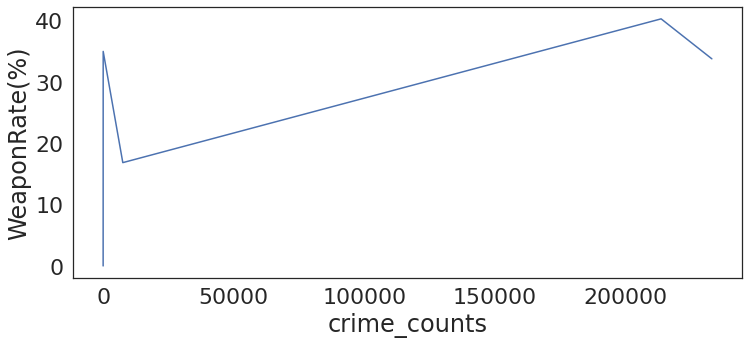

In [32]:
sns.lineplot(data = VictimCrimeWithWeaponRates, x='crime_counts', y='WeaponRate(%)')


The trend of crime counts and weapon rates does exist in the graph. One main reason is that the crime counts may take the victim sex into consideration and therefore does reflect the weapon rate. 

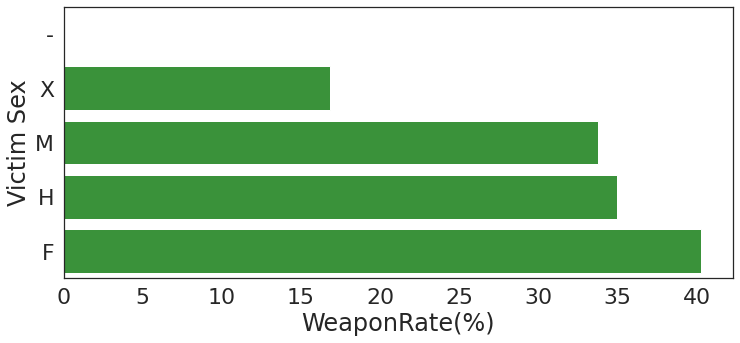

In [33]:
df_sorted = VictimCrimeWithWeaponRates.sort_values('WeaponRate(%)')
plot_weaponRate = sns.barplot(x="WeaponRate(%)", y="Victim Sex", palette = ['tab:green'], data=df_sorted)
plt.show(plot_weaponRate)

From the bar plot shown by weapon rate and victim sex, we can see that the higher weapon usage rate (>=40%)are located in female victims. We can see there is a difference between the victim sex and the weapon rate

maximum occurance is 11973, minimal occurance is 25


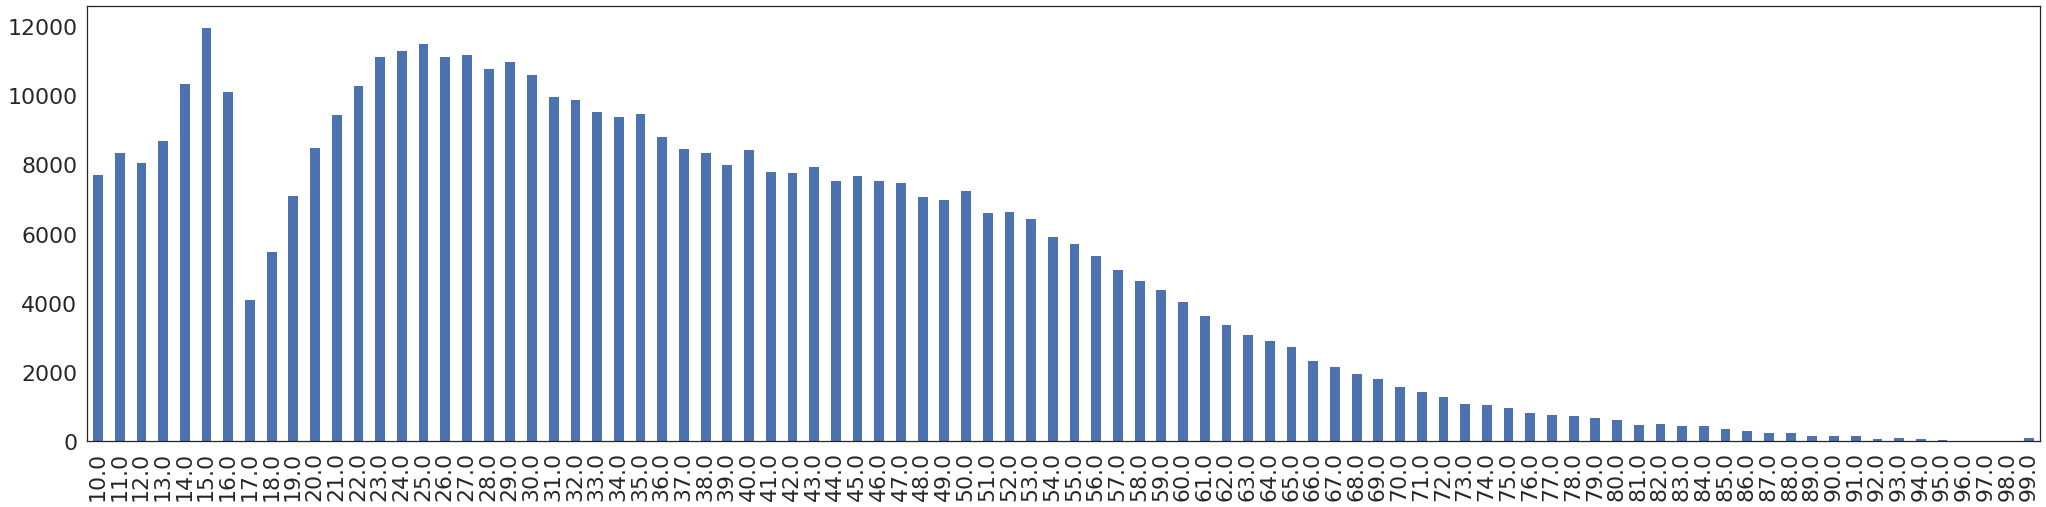

In [34]:
# Plot count of crime codes
weaponToVictim['Victim Age'].value_counts().sort_index().plot(kind="bar", figsize=(35, 8))
top_occur = weaponToVictim['Victim Age'].value_counts().max()
min_occur = weaponToVictim['Victim Age'].value_counts().min()
print(f'maximum occurance is {top_occur}, minimal occurance is {min_occur}')

We have further conclusion as we can see above that the occurances of victim age greatly varies, while most of them occur centered clustered in 1000 to 125000 times. We also want to look at the count and percentage because uncommon crimes might just occur with weapons by chance since the sample account is small. 

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

Ethics and privacy are critical considerations in the data science projects. As our project focused on the criminal activity in LA, there are many ethical concerns that can potentially involve in the project analysis. Ethics concerns consider the whole data science process involve the bias in data, data collected and used, and post analysis. For example, when analyzing the criminal activity data, it is extremely important to consider the potential biases in the data that could potentially impact the results. For example, certain neighborhoods or demographics may be overrepresented or underrepresented, that could skew the results of the data and make the data analysis results become biased. It is therefore important to account for these biases and ensure that the accurate analysis is as equitable as possible. In the dataset website we find, the dataset is expected to reflect the incidents of crime in the City of LA dating back to 2010. This data is transcribed from original crime reports and there may be inaccuracies within the data due to the inaccuracies within the original crime reports. Also, according to the website, some location fields with missing data are noted, this could cause the potential bias.
The privacy concerns involved in the data for criminal activity data may include sensitive personal information, such as victim names or addresses, which could potentially be used to identify the individuals. It is therefore extremely important to ensure that any personal identifying information is protected and that the data is used in a manner that respects an individual's privacy. The potential for harm is that analyzing the criminal activity data could potentially lead to harm or discrimination against certain populations or neighborhoods. It is therefore important to be mindful of these potential impacts and ensure that the analysis is conducted in an ethical and equitable manner. With respect to the policy implications, the results of the analysis could have important policy implications, such as decisions regarding police use of the force or resource allocation. It is important to ensure that these policy decisions are made in an ethical and equitable manner, by taking into account the potential impacts on the different populations. 
In order to address these concerns, we need to carefully review the crime data from the website and identify any potential biases or privacy concerns. We also need to take steps to ensure that the analysis is conducted in an ethical and equitable manner, such as accounting for any biases in the data, and being mindful of the potential impacts on the different populations to be transparent about the methods and findings.

# Conclusion & Discussion

&emsp;As an result of our Explorations on the data set. We cannot make an certain conclusion on whether area, crime types, or victims affect whether weapons are used. But we can makes some definitely see that some features clearly correlates to more weapon usage.<br>
&emsp;We can first look at how area affect the weapon usage. Since we don't have enough information about the crime rate or population in an area. Thus it would be biased for us to conclude that some area will likely to cause more harm to its residents than other areas. But overall, we can tell that weapons are more likely to be used in south and central LA during crimes. Thus it can serve as a warnings for the officers working in those area, especially for South LA, which has a 40% weapon usage rate in crimes contrasting the 25% weapon usage rate in crimes in Valley LA. Moreover, the crime in southeast region has a bazzaring 50% weapon usage rate in crimes. Which may lead to some interesting research topic such as does population in an area cause the weapon usage in crimes to be high that we can later dive into.<br>
&emsp;We can then look at how crime type affect the weapon usage. Similar from our analysis on area's effect on weapon usage, we cannot say that some types of crime are highly likely to have higher weapon usage rate. Because we do not know on how data are collected and whether the data collected are biased. Hoewever, according to our data, some of the crimes in this dataset not only has high weapon usage rate, they also occur relatively often. Which leads me into believe there may be a high correlation between crime types and weapon usage. When looking at the weapon usage rate by crime codes, we can see that many of them possess a weapon usage rate close to 100%, among the highest of them, diregarding the crime titles such as 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', other crime types such as 'BATTERY - SIMPLE ASSAULT', 'ROBBERY', and 'INTIMATE PARTNER - SIMPLE ASSAULT' do not have weapons in their titles. However, it still does not soud suprised when we hear those crime titles. Which even further assured us that maybe there are high connections between weapon usage and crime type. It would be interesting to further dive into this topic and check whether we can predict weapon usage based crime type with machine learning models. Which can help justify police pointing their guns at some criminal while not pointing at some other criminals.<br>
&emsp;We can then look at how victims affect the weapon usage. Same as above, we do not have enough information to make conclusion. But we can look at the sex of the victims and discover possible connections to weapon usage. After plotting out the weapon usage rate on victims with different sex. We discover that women in particular attract the criminals to use weapons more. It would be an iteresting topic to discover whether sex of victims cause them to be more likely to be assulted by weapon. And when we are looking at when ages is plotted against the crimes, the ages of victims peaks at 15 and 25, and we don't know whether that's caused by ages.<br>
&emsp;In conclusion, we do find connections between weapon usage and crime types, victims, and area. But to determine causation, or to use data to determine whether police are justified to use their guns, we have to claim an unbiased dataset and run predictions.


# Team Contributions

Zeyu Cao - Hypothesis, Dataset(s), Setup, Data Cleaning, EDA and Analysis on Area to Weapon, Overview

Siying (Avon) Yang - EDA and Analysis on Victim to Weapon

Yandong Xiang - Research Question, Dataset, timeline, EDA and Analysis on crime to weapon, Conclusion

Muqing Di - Background & Prior Work, Video Presentation, Report Formatting, Data Analysis

Tianshi Hu - EDA of geographic distribution on weapon usage in crimes, minor mistakes correction
